텍스트 마이닝
```
텍스트에서 유의미한 정보를 추출
카운트기반 : 단어빈도(Bag of Words ,TF-IDF) 전통적인 기법
시퀀스 : 문맥과 순서를 고려, 워드 임베딩(Word2Vec ,BERT) , 딥러닝
```
텍스트 전처리
```
원시 텍스트를 분석가능한 형태로 변환과정
기법
  토큰화:문장을 단어 또는 서브워드 단위로 분리
  어간/표제어추출: 단어의 기본형태로 변환(running->run)
  불용어 처리:분석에 불필요한 단어(the, it , at ...)
  품사태깅:단어의 품사를 식별 문맥 이해
  정규화: 대소문자 통합, 특수문자 제거
도구
  영어 NLTK, ..
  한국어 : KoNLP(Mecap, Okt...)  
```

In [3]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 21.5 MB/s eta 0:00:00


In [4]:
# NLTK 데이터 다운로드
import nltk
nltk.download('punkt')  # 문장을 단어로 나누는 토크나이져 모델을 다운로드
nltk.download('stopwords')  # 불용어 다운로

# KoNLP 설치 확인
from konlpy.tag import Okt
okt = Okt()
okt.morphs('나는 자연어 처리를 공부한다')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['나', '는', '자연어', '처리', '를', '공부', '한다']

In [5]:
okt.pos('나는 자연어 처리를 공부한다')

[('나', 'Noun'),
 ('는', 'Josa'),
 ('자연어', 'Noun'),
 ('처리', 'Noun'),
 ('를', 'Josa'),
 ('공부', 'Noun'),
 ('한다', 'Verb')]

폼사태그
```
Noun : 명사
Josa : 조사
Verb : 동
```

In [6]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

영어 문장 전처리(NLTK)

In [7]:
# 영어 텍스트 처리(NLTK)
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string   # 특수문자들의 집합 string.punctuation

# 샘플
text = "This is as sample text, with some punctuation and stopwords!"
# 소문자로 변환
text = text.lower()
# 특수문자 제거
text = text.translate(str.maketrans('','',string.punctuation))
print(text)
# 토큰화
tokens = word_tokenize(text)
print(f'토큰화 : {tokens}')

# 불용어 제거
#1 불용어 사전생성
stop_words =  set(stopwords.words('english'))
#2. 토큰들중에서 불용어에 속하지 않은 토큰만 분리
tokens = [ word for word in tokens if word not in stop_words ]
print(f'영어문장 전처리 : {tokens}')

this is as sample text with some punctuation and stopwords
토큰화 : ['this', 'is', 'as', 'sample', 'text', 'with', 'some', 'punctuation', 'and', 'stopwords']
영어문장 전처리 : ['sample', 'text', 'punctuation', 'stopwords']


한국어 텍스트 전처리(KoNLP)

In [8]:
from konlpy.tag import Okt
# 샘플 텍스트
text = "이것은 한국어 텍스트 마이닝 예제입니다."
# 형태소 분석기
okt = Okt()
# 토큰화 및 품사태깅
tokens = okt.pos(text, norm=True, stem=True)  # norm=True  정규화,   stem=True 어간추출(했습니다->하다)
print(f'토큰화 및 품사태깅 : {tokens}')
# 명사만 추출
nouns = [ word  for word, pos in tokens if pos ==  'Noun']
print(f'명사 : {nouns}')
# 불용어 제거(사용자 정의 불용어 리스트)
stop_words = ['것','마','이닝']
nouns = [word for word in nouns if word not in stop_words]
print(f'전처리 : {nouns}')

토큰화 및 품사태깅 : [('이', 'Determiner'), ('것', 'Noun'), ('은', 'Josa'), ('한국어', 'Noun'), ('텍스트', 'Noun'), ('마', 'Noun'), ('이닝', 'Noun'), ('예제', 'Noun'), ('이다', 'Adjective'), ('.', 'Punctuation')]
명사 : ['것', '한국어', '텍스트', '마', '이닝', '예제']
전처리 : ['한국어', '텍스트', '예제']


In [9]:
!pip install ko-ww-stopwords -q

In [10]:
from ko_ww_stopwords.stop_words import ko_ww_stop_words
from ko_ww_stopwords.tools import is_stop_word, strip_outer_punct
print(ko_ww_stop_words)

{'또', '헉', '자신', '나', '이것들', '혼자', '삼', '잠깐', '저', '일', '하나도', '여기', '구', '휴', '어느', '언젠가', '그런', '어이', '오로지', '같이', '채로', '어떠한', '아홉', '오히려', '즉', '진짜로', '육', '요컨대', '어디', '주라고', '뭐', '어때', '그렇지만', '겸', '그것들', '얼마만큼', '못', '아직', '저기', '야', '툭', '이쪽', '함께', '퉤', '이런', '셋', '참', '얼마', '일곱', '된다', '둘', '제', '어', '오자마자', '칠', '이것', '마터면', '몇', '자', '차라리', '전자', '조금', '할뿐', '좀', '아무', '위해서', '이때', '왜', '여섯', '저것', '저까짓', '때', '언제', '뭘', '이곳', '저쪽', '때문에', '혼자서', '어떤', '만큼', '향하여', '혹시', '우선', '자기', '어떤것', '전부', '정도로', '사', '이', '십', '어떤것들', '저런', '이까짓', '그것', '얼마나', '하나', '무엇', '향해서', '예컨대', '허', '적이', '외에도', '우리', '열', '한다', '이상', '틈타', '예하면', '첫번째로', '훨씬', '및', '제각기', '안', '수', '여부', '대로', '왜냐하면', '그', '팔', '그까짓', '달라고', '오', '만일', '했다', '바로', '잠시', '응', '흥', '넷', '됐다', '타인', '번', '여덟', '다섯', '듯이', '통하여', '스물', '테니까', '거니까', '실로', '따라', '즉시'}


전처리
```
영어
  소문자
  특수문자 제거
  불용어사전 다운로드
  불용어 제거
한국어
  품사태깅
  품사중에 명사만 추출
  사용자 정의 불용어사전
  불용어 제거
```

In [11]:
def preprocess_text(text, lang = 'kor'):
  if lang == 'kor':
    # 한국어 전처리
    okt = Okt()
    tokens = okt.pos(text, norm=True,stem=True)
    nouns = [word for word, pos in tokens if pos == 'Noun']
    # 불용어  (기존 만들어진것 이용, 사용자가 정의)
    stop_words = ['것','마','이닝']
    nouns = [word for word in nouns if word not in stop_words]
    return nouns

  else:
    # 영어 전처리
    text = text.lower()
    text = text.translate(str.maketrans('','',string.punctuation))
    # 공백을 기준으로 토큰화
    tokens = word_tokenize(text)
    # 불용어 제거
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [12]:
preprocess_text("this is a sample text!!!",lang='eng')

['sample', 'text']

In [13]:
preprocess_text("한국어 텍스트 문장 입니다!.")

['한국어', '텍스트', '문장']

BOW 기반 테스트 마이닝
```
BOW:  문서를 단어집합으로 표현, 단어순서 무시
카운트벡터: 단어빈도를 벡터로 표현
TF_IDF : 단어의 중요도를 반영한 가중치 벡터
```
```
문서분류 : 텍스트를 카테고리로분류(긍정 부정)
알고리즘 : 나이브 베이지, 로지스틱회귀, 결정트리 ,SVM
N-gram : 단어순서 일부반영("not good" 을 하나의 특성)
```
```
차원축소 : BOW벡터는 고차원
  PCA : 분산최대화로
  LSA(Latent Semantic Analysis) SVD로 잠재의미 추출
  t-SNS : 비선형 시각화
```

```
토픽모델링
  문서집합에서 주요주제를 추출
  LDA : 문서가 여러 토픽의 혼합으로 구성된다고 가정, 각 토픽은 단어 분포로 표현
  뉴스분석, 고객 피드백 분류 등
```
```
감성분석
  긍정 부정 중립
  머신러닝기반 : BOW + 분류모델
```

```
BOW : 문장내 단어들의 집합
Counter Vector : BOW 기반으로 빈도
TF : (Term Frequency) 문서에서 단어의 빈도를 전체 단어수로 나눔, 단어가 문서에서 얼마나 중요한 지를 상대적으로
IDF :  Inverse Document Frequency  모든 문서에서 해당 단어가 얼마나 희귀한지
log(N / df(t)) + 1  (N 문서수, df(t) 단어가 등장한 문서수)

TF-IDF : TF X IDF  단어의 중요도를 가중치로 반영한 벡터
자주 나오면서 문서 전체에서 희귀한 단어에 높은 점수를 부여
```

카운트기반 벡터화

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from konlpy.tag import Okt
import numpy as np
# sample text
texts = ['한국 경제는 성장 중입니다.','경제 성장률이 둔화되고 있습니다']
# 형태소 분석
ok = Okt()
# 불용어
stop_words = ['중','률']
tokenized_texts = [okt.nouns(text) for text in  texts]
tokens = []
for i in tokenized_texts:
  tokens += i
tokens
tokenized_texts = [ word for word in tokens if word not in stop_words]
print(tokenized_texts)
# 카운트 벡터화
vectorized = CountVectorizer()
count_matrix = vectorized.fit_transform(tokenized_texts).toarray()
print(count_matrix)  # one-hot 인코딩
print(vectorized.vocabulary_) # dic

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(tokenized_texts)
print(tfidf_matrix.toarray())

['한국', '경제', '성장', '경제', '성장', '둔화']
[[0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]]
{'한국': 3, '경제': 0, '성장': 2, '둔화': 1}
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


TF-IDF
```
TF(t) = 특정 단어t가 나타난횟수 /문서의 모든 단어개수
IDF(t) = log(총문서개수 / 단어t를 포함한 문서개수)

s1 = 나는 오늘 공원을 갔다  : 단어개수 5
s2 = 오늘 나는 도서관에 갔다
s3 = 공원에서 나는 책을 읽었다

tf('공원') = 1/5 = 0.2
idf('공원') log(3/2) = 0.176
tf-idf 는 두개를 곱해서 0.0352
공원이라는 단어의 중요도는 0.0352
```

문서분류
```
나이브 베이즈 분류기
 베이즈 를 기반으로 한 확률 분류
 특성간의 조건부 독립을 가정
```
베이즈 정리
$$P(c \mid \mathbf{x}) = \frac{P(c) \cdot P(\mathbf{x} \mid c)}{P(\mathbf{x})}$$
```
나이브 가정(조건부 독립 가정)
```
$$P(\mathbf{x} \mid c) = \prod_{i=1}^{n} P(x_i \mid c)$$
최종 분류
$$\hat{c} = \arg\max_{c} P(c) \prod_{i=1}^{n} P(x_i \mid c)$$

문서분류

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

In [16]:
!wget http://skt-lsl-nlp-model.s3.amazonaws.com/KoBERT/datasets/nsmc/ratings_train.txt
!wget http://skt-lsl-nlp-model.s3.amazonaws.com/KoBERT/datasets/nsmc/ratings_test.txt

--2025-04-21 07:05:25--  http://skt-lsl-nlp-model.s3.amazonaws.com/KoBERT/datasets/nsmc/ratings_train.txt
Resolving skt-lsl-nlp-model.s3.amazonaws.com (skt-lsl-nlp-model.s3.amazonaws.com)... 52.219.148.46, 3.5.188.101, 52.219.60.126, ...
Connecting to skt-lsl-nlp-model.s3.amazonaws.com (skt-lsl-nlp-model.s3.amazonaws.com)|52.219.148.46|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘ratings_train.txt’

ratings_train.txt   100%[===================>]  13.95M  6.47MB/s    in 2.2s    

2025-04-21 07:05:28 (6.47 MB/s) - ‘ratings_train.txt’ saved [14628807/14628807]

--2025-04-21 07:05:28--  http://skt-lsl-nlp-model.s3.amazonaws.com/KoBERT/datasets/nsmc/ratings_test.txt
Resolving skt-lsl-nlp-model.s3.amazonaws.com (skt-lsl-nlp-model.s3.amazonaws.com)... 52.219.148.46, 3.5.188.101, 52.219.60.126, ...
Connecting to skt-lsl-nlp-model.s3.amazonaws.com (skt-lsl-nlp-model.s3.amazonaws.com)|52.219.148.46|:80... connected.
HTTP request

In [17]:
import pandas as pd
df = pd.read_csv('ratings_train.txt',sep='\t')
df.dropna(inplace=True)

In [18]:
# 데이터셋 생성  Dataset 라이브러리 로드
from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
  def __init__(self,train=True):
    self.train = train
    df = pd.read_csv('ratings_train.txt',sep='\t')
    df.dropna(inplace=True)
    df=df.iloc[:1000, :]
    self.train_data = df['document'].to_numpy()
    self.train_label = df['label'].to_numpy()
    df = pd.read_csv('ratings_test.txt',sep='\t')
    self.test_data = df['document'].to_numpy()
    self.test_label = df['label'].to_numpy()
  def __len__(self):
    if self.train:
      return len(self.train_data)
    else:
      return len(self.test_data)
  def __getitem__(self,idx):
    if self.train:
      return self.train_data[idx], int(self.train_label[idx])
    else:
      return self.test_data[idx], int(self.test_label[idx])

custom = CustomDataset()
data, label  = next(iter(custom))
data,label

('아 더빙.. 진짜 짜증나네요 목소리', 0)

In [19]:
from tqdm import tqdm
# 한국어 영화리뷰
# 데이터셋 가져오기
dataSet = CustomDataset()
# 전처리 및 벡터화
  # 품사 태깅 객체
okt = Okt()
  # 명사만 추출
texts, labels = [],[]
for text, label in tqdm(dataSet):
  texts.append(' '.join(okt.nouns(text)))
  labels.append(label)

100%|██████████| 1000/1000 [00:19<00:00, 51.41it/s]


In [20]:
texts[:3], labels[:3]

(['더빙 진짜 목소리', '흠 포스터 보고 초딩 영화 줄 오버 연기', '무재 밓었 다그 래서 추천'], [0, 1, 0])

In [21]:
# 벡터화
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X, labels, test_size=0.2, random_state=42)
# 분류기
model = MultinomialNB()
model.fit(X_tr, y_tr)
# 예측 및 평가
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       101
           1       0.70      0.61      0.65        99

    accuracy                           0.68       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.68      0.68      0.67       200



N-gram
```
1-gram : 유니그램 : 단일단어(좋은, 영화)
2-gram : 바이그램 : 연속된 두 단어(좋은 영화, 영화 재미)
N-gram : 단어간 순서와 문맥을 일부 반영해 Bow의 단점을 보안
```

In [22]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0])

차원축소

In [23]:
from sklearn.decomposition import TruncatedSVD   # 고차원 데이터를 저차원으로 압축하는 차원 축소기법
# 희소행렬에 잘 동작
# 회소행렬은 대부분의 원소가 0인 행렬
# 만개의 단어가 있는 단어장
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [24]:
# 데이터 : 20뉴스그룹
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'))
texts = news.data

In [25]:
# tf-idf 벡터화
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(texts)

In [26]:
# LSA
lsa = TruncatedSVD(n_components=2)
X_lsa = lsa.fit_transform(X)

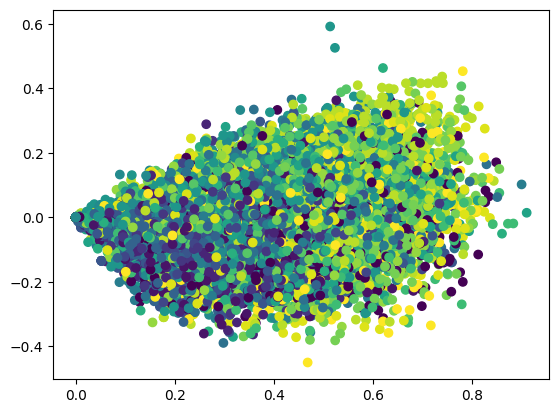

In [27]:
plt.scatter(X_lsa[:,0], X_lsa[:,1], c=news.target)
plt.show()

토픽 모델링
```
LDA(Latent Dirichlet Allocation)
  각 주제들은 특정단어들의 확률 분포포 표현된다
  예 뉴스기사는 "정치" "경제" "문화" 라는 주제가 혼합된 형태로 표현될수 있음
  문장내의 주제를 해설 할 수 있다
사용사례
  문서 분류: 주제별로 분류
  트랜드 분석 : 데이터에서 현재 주제의 흐름을 분석
  추천 시스템 : 사용자의 관심사를 기반으로
예시
  나는 축구를 좋아한다
  농구는 재미있다
  축구와 농구는 인기있는 스포츠이다
```

In [28]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
# 뉴스기사
news = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'))
texts = news.data[:10000]
# 벡터화
vectorized = CountVectorizer(max_features=1000)
X = vectorized.fit_transform(texts)
# LDA 학습
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)
# 토픽별 단어 출력
vectorized.get_feature_names_out()

array(['00', '000', '02', '04', '10', '100', '11', '12', '128', '13',
       '14', '145', '15', '16', '17', '18', '19', '1992', '1993', '1d9',
       '1st', '1t', '20', '200', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '34u', '35', '37', '3d',
       '3t', '40', '44', '45', '50', '55', '60', '70', '75', '75u', '80',
       '800', '90', '92', '93', 'a86', 'able', 'about', 'above', 'ac',
       'accept', 'access', 'according', 'action', 'actually', 'add',
       'address', 'administration', 'advance', 'after', 'again',
       'against', 'ago', 'agree', 'ah', 'air', 'al', 'algorithm', 'all',
       'allow', 'almost', 'along', 'already', 'also', 'although',
       'always', 'am', 'american', 'among', 'an', 'and', 'anonymous',
       'another', 'answer', 'answers', 'anti', 'any', 'anybody', 'anyone',
       'anything', 'anyway', 'appears', 'apple', 'application',
       'applications', 'appreciated', 'april', 'arab', 'archive', 'are',
       '

In [29]:
for i, topic in enumerate(lda.components_):
  print(topic.argsort()[-10:])
  break

[ 57  21  19  38 257 131 674 379 559 129]


In [30]:
# 토픽별 단어 출력
terms = vectorized.get_feature_names_out()
for i, topic in enumerate(lda.components_):
  top_terms =  [ terms[j]for j in topic.argsort()[-10:] ]
  print(f'Topic: {i+1} : {top_terms}')

Topic: 1 : ['a86', '1t', '1d9', '34u', 'cx', 'b8f', 'pl', 'g9v', 'max', 'ax']
Topic: 2 : ['14', '50', '25', '16', '11', '15', '12', '20', '00', '10']
Topic: 3 : ['have', 'not', 'and', 'of', 'it', 'the', 'is', 'you', 'that', 'to']
Topic: 4 : ['with', 'it', 'on', 'in', 'is', 'for', 'of', 'and', 'to', 'the']
Topic: 5 : ['on', 'for', 'was', 'is', 'that', 'in', 'to', 'and', 'of', 'the']


정리
```
문장을 - 수치화
  BOW : 문장에서 단어의 등장횟수
  TF-IDF : 문장내의 단어의 중요도를 반영
  차원축소 : 피처가 많아서 축소 SVD 기법을 이용한 축소
  토픽을 분석 :문장을 몇개의 토픽으로 분리하고 각 토픽별 중요 단어분석
  감정 분석(분류) : 문장의 라벨링을 줘서 분류문제로 해결
```

텍스트 마이닝 + 딥러닝
```
인공신경망
RNN
워드 임베딩
CNN : 이미지 뿐만 아니라 텍스트 및 시계열 뛰어난 성능
  1D 합성곱 N-gram과 비슷한 패턴
어텐션과 트랜스포머
  어텐션 : 중요한 단어에 가중치를 부여
  트랜스포머 : 어텐션을 이용한 아키텍처 RNN 없이 시퀀스 처리
  구성 : 셀프어텐션, 멀티헤드 어텐션, 피드포워드 어텐션
  병령처리와 정거리 의존성 학습 RNN/LSTM 대처  
BERT
  트랜스포머 계열의 자연어모델 : 양방향 문맥 학습 - 전이학습
  fine-tunning(미세조정) : 분류, 질의 응답
  KoBERT  
```

1. 인공신경망 이용 텍스트 분류
```
데이터 : 네이버영화 긍정부정
전처리
  품사태깅을 통해 명사추출
  불용어사전을 통해서 불용어 제거
TF-IDF 벡터화
모델정의  
```

데이터 취득

In [31]:
import pandas as pd
df = pd.read_csv('ratings_train.txt',sep='\t').dropna()[:10000]
texts = df.document.to_numpy()
labels = df.label.to_numpy()
texts[2]

'너무재밓었다그래서보는것을추천한다'

전처리&불용어 처리

In [32]:
# !pip install ko-ww-stopwords -q
from ko_ww_stopwords.stop_words import ko_ww_stop_words
from konlpy.tag import Okt
stop_words = list(ko_ww_stop_words)
print(stop_words[:10])

okt = Okt()
okt_nouns = [ okt.nouns(text) for text in texts ]

['또', '헉', '자신', '나', '이것들', '혼자', '삼', '잠깐', '저', '일']


In [33]:
okt_texts = []
for words in okt_nouns:
  temp = ' '.join([word for word in words if len(word) >=2 and word not in stop_words])
  okt_texts.append(temp)

okt_texts[:5]

['더빙 진짜 목소리',
 '포스터 보고 초딩 영화 오버 연기',
 '무재 밓었 다그 래서 추천',
 '교도소 이야기 구먼 재미 평점 조정',
 '몬페 연기 영화 스파이더맨 커스틴 던스트']

TF-IDF 벡터화

In [34]:
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
X =  tfidf.fit_transform(okt_texts).toarray()
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(labels, dtype=torch.float32)

In [35]:
X.shape, y.shape

(torch.Size([10000, 1000]), torch.Size([10000]))

MLP
```
fc1- relu - fc1
```

In [36]:
import torch.nn as nn
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(1000,500)
    self.fc2 = nn.Linear(500,1)
    self.relu = nn.ReLU()
  def forward(self,x):
    x = self.relu(self.fc1(x))
    x = self.fc2(x)
    return x
model = MLP()
model

MLP(
  (fc1): Linear(in_features=1000, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=1, bias=True)
  (relu): ReLU()
)

In [37]:
from tqdm import tqdm
loss_fn = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(model.parameters(), lr=0.01)
# 학습
epochs = 100
device = 'cuda' if torch.cuda.is_available() else 'cpu'
all_loss = 0.0

model.to(device)
X,y = X.to(device), y.to(device)
for epoch in range(epochs):
  y_pred = model(X)
  loss = loss_fn(y_pred,y.unsqueeze(dim=-1))
  loss.backward()
  optim.step()
  optim.zero_grad()
  if epoch == 10:
    print(f'loss: {loss.item()}')

loss: 0.48046377301216125


LSTM 감성분석
```
Word2Vec 모델 학습 : 각 단어를 벡터로 임베딩
```

In [6]:
!pip uninstall numpy
!pip install numpy==1.23.5

Found existing installation: numpy 2.2.5
Uninstalling numpy-2.2.5:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/numpy-config
    /usr/local/lib/python3.11/dist-packages/numpy-2.2.5.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99-934c22de.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-6bb31eeb.so
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-2.2.5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 23.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.2 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
thinc 9.1.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23

In [1]:
!pip uninstall gensim
!pip install gensim

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/gensim-4.3.3.dist-info/*
    /usr/local/lib/python3.11/dist-packages/gensim/*
Proceed (Y/n)? y
  Successfully uninstalled gensim-4.3.3
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


In [2]:
!pip install --upgrade thinc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 49.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: blis
    Found existing installation: blis 1.3.0
    Uninstalling blis-1.3.0:
      Successfully uninstalled blis-1.3.0
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.6
    Uninstalling thinc-8.3.6:
      Successfully uninstalled thinc-8.3.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 wh

In [4]:
import pandas as pd
import torch
from gensim.models import Word2Vec
df = pd.read_csv('ratings_train.txt',sep='\t').dropna()[:10000]
texts = df.document.to_numpy()
labels = df.label.to_numpy()
# texts  토근화된 텍스트 [ ['',''],['','']   ]  전처리
# !pip install ko-ww-stopwords -q
from ko_ww_stopwords.stop_words import ko_ww_stop_words
from konlpy.tag import Okt
stop_words = list(ko_ww_stop_words)

okt = Okt()
okt_nouns = [ okt.nouns(text) for text in texts ]
okt_texts = []
for words in okt_nouns:
  temp = [word for word in words if len(word) >=2 and word not in stop_words]
  okt_texts.append(temp)
okt_texts[:5]

# Word2Vec 모델  각 단어를 벡터로 학습
w2v = Word2Vec(okt_texts,vector_size=100,window=5,min_count=1)
# 단어를 인덱스로 매핑
word2idx = { word:idx for idx, word in  enumerate(w2v.wv.index_to_key) }
# 각 문장을 단어 인덱스의 시퀀스로 변환
X = [ torch.tensor([ word2idx.get(w,0) for w in text]) for text in okt_texts]
# 서로 다른 길이의 시퀀스를 같은 길이로패딩
from torch.nn.utils.rnn import pad_sequence
X = pad_sequence(X, batch_first=True)  # batch_size, max_seq_len
y = torch.tensor(labels, dtype=torch.float32)

lstm 기반 감성분류 모델 정의

In [8]:
import torch.nn as nn
class LSTMClassifier(nn.Module):
  def __init__(self,vacab_size, embed_size,hidden_size):
    super().__init__()
    # 단어 인덱스를 벡터로 변환(학습가능한상태)
    self.embedding = nn.Embedding(vacab_size, embed_size)
    # lstm 레이어 batch, seq, feature
    self.lstm = nn.LSTM(embed_size,hidden_size,batch_first=True)
    # 마지막 lstm 출력  lstm의 hidden state를 받아서 최종 출력 fc
    self.fc = nn.Linear(hidden_size, 1)
  def forward(self, x):
    # 1 단어인덱스로 임베딩 벡터
    x = self.embedding(x)

    # lstm 입력형태
    # output,(hn,cn) = lstm(input, (ho,co))
    # input  B,S,I

    # lstm 통과 마지막 hidden state 만 사용  g
    _,(hidden,_)  = self.lstm(x)  # 입력에서 (ho,co) 사용안하면 내부에서 자동으로 생성됨
    x = self.fc(hidden[-1])  # 히든 스테이트의 마지막 타임스텝
    return x

In [9]:
# 학습루프
import torch
model = LSTMClassifier(vacab_size=len(word2idx),embed_size=100,hidden_size=128)
loss_fn = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 100
for epoch in range(epochs):
  y_pred = model(X).squeeze()  # (Batch_size, )
  loss = loss_fn(y_pred,y)
  loss.backward()
  optim.step()
  optim.zero_grad()
  if epoch % 10 == 0:
    print(f'loss: {loss.item()}')

loss: 0.6985858678817749
loss: 0.6962767839431763
loss: 0.6934070587158203
loss: 0.6931706666946411
loss: 0.6931337118148804
loss: 0.693108081817627
loss: 0.6930862069129944
loss: 0.6930823922157288
loss: 0.6930795907974243
loss: 0.693077564239502


Word2vec VS TF-IDF : 텍스트데이터를 벡터로 표현하는 방법
```
특징  word2vec
기본  단어의 의미를 밀집벡터로 표현, 단어간의 유사성을 학습
원리
  TF-IDF
  단어의 빈도, 단어의 중요도를 기반으로 단어를 벡터

벡터의특징
   w2v : 밀집벡터(Dense Vector) 보통 크기가 작음(100~300차원)
   tfidf: 희소벡터(Sparse Vector) 단어수와 동일한 차원(수만차원)
단어의미
  w2v : 유사한단어끼리 비슷한 벡터값 king-man  queen-woman
  tfidf: 단어의 빈도와 중요도만 반영
학습과정
  w2v : 대규모 텍스트기반 신경망  
  tfidf : 문서에서 직접 tf-idf 값을 계산
문맥반영
  w2v : 단어의 위치나 문맥을 반영
  tfidf: 문맥반영안되고 단순히 빈도를 고려
활용
  w2v:임베딩벡터를 활용해서 텍스트분류,감성분석, 추천시스템
  tfidf: 유사도계산, 간단한 텍스트 분류   

```

CNN

In [13]:
# 1. 데이터 로드
df = pd.read_csv('ratings_train.txt',sep='\t').dropna()[:100]
texts = df.document.tolist()
labels = df.label.tolist()

# 전처리
# 2. 형태소 분석(명사만 추출) - 불용어 처리가 누락....
from konlpy.tag import Okt
okt = Okt()
okt_nouns = [ okt.nouns(text) for text in texts ]
okt_nouns
# 3. 단어사전
# [ [ token for token in tokens if len(token) >=2 ]  for tokens in okt_nouns]  # [['더빙', '진짜', '목소리'],

all_tokens = [ token for tokens in okt_nouns for token in tokens if len(token)>=2  ]
all_tokens  = ['<pad>','<unk>'] + list(set(all_tokens))
word2idx = { word:idx for idx,word in enumerate(all_tokens) }  # 단어사전에 없는 단어는 1 길이를 맞추는 패딩은 0

# 4. 텍스트를 인덱스로 변환
# 각 문장을 단어 인덱스의 시퀀스로 변환
X = [ torch.tensor([ word2idx.get(w,1) for w in text]) for text in okt_nouns]
X
# # 서로 다른 길이의 시퀀스를 같은 길이로패딩
# from torch.nn.utils.rnn import pad_sequence
# X = pad_sequence(X, batch_first=True)  # batch_size, max_seq_len
# y = torch.tensor(labels, dtype=torch.float32)
# y = y.unsqueeze(dim=-1)
# X.shape, y.shape

[tensor([302,  50,  10]),
 tensor([  1, 300, 338,  15, 231,   1, 144, 212]),
 tensor([322,  57, 270, 152,   3]),
 tensor([216, 193, 224, 153, 320,  65]),
 tensor([229,   1, 212, 231,  83, 164, 297]),
 tensor([  1, 198,   1,   1, 248, 134, 205, 231,  67,   1]),
 tensor([346, 118, 171]),
 tensor([  1,  67,   1, 288, 176,  34,   1, 276,   1, 227, 108, 258, 263,  58,
          58, 196, 104, 212, 190,   1]),
 tensor([215, 153,   1, 231]),
 tensor([141, 320,   1,   1,   1, 238]),
 tensor([236,   1,  50]),
 tensor([261, 145, 194,  63,  61, 268,  22,  31]),
 tensor([309,   1, 245,   1,   1, 250, 212]),
 tensor([ 84, 135,   1, 190,   1]),
 tensor([ 74, 350, 186,  50, 191, 204, 231, 262, 307,   1, 316,   1, 295, 157,
         316, 157]),
 tensor([  1,   4, 177, 292]),
 tensor([190, 181, 139, 291,   1,  88, 139,  17, 313, 321,   1]),
 tensor([185, 260, 165,   1,  87,   1,   1,  53, 153]),
 tensor([348, 276,  41, 116, 252, 349,  37,  41,  82]),
 tensor([ 94,   1, 290,   1,   1, 242,   1]),
 tensor

In [14]:
okt_nouns

[['더빙', '진짜', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기'],
 ['무재', '밓었', '다그', '래서', '추천'],
 ['교도소', '이야기', '구먼', '재미', '평점', '조정'],
 ['몬페', '의', '연기', '영화', '스파이더맨', '커스틴', '던스트'],
 ['막', '걸음', '마', '세', '초등학교', '학년', '생인', '영화', '반개', '움'],
 ['원작', '긴장감', '제대로'],
 ['별',
  '반개',
  '욕',
  '이응경',
  '길용우',
  '생활',
  '년',
  '정말',
  '발',
  '해도',
  '그것',
  '납치',
  '감금',
  '반복',
  '반복',
  '드라마',
  '가족',
  '연기',
  '사람',
  '네'],
 ['액션', '재미', '몇', '영화'],
 ['왜케', '평점', '꽤', '볼', '데', '헐리우드'],
 ['인피니트', '짱', '진짜'],
 ['볼때', '향수', '자극', '허진호', '감성', '절제', '멜로', '달인'],
 ['울면', '손', '횡단보도', '때', '뻔', '이범수', '연기'],
 ['로만', '자꾸', '그', '사람', '것'],
 ['취향',
  '존중',
  '다지',
  '진짜',
  '내생',
  '극장',
  '영화',
  '가장',
  '노잼',
  '노',
  '감동',
  '임',
  '스토리',
  '어거지',
  '감동',
  '어거지'],
 ['냥', '매번', '긴장', '재밋음'],
 ['사람', '바스코', '이기', '락스', '코', '바비', '이기', '아이돌', '그냥', '안달', '것'],
 ['굿바이', '레닌', '표절', '것', '이해', '왜', '뒤', '갈수록', '재미'],
 ['이건', '정말', '깨알', '캐스팅', '질퍽', '용구성', '버무러진', '깨알', '일드'],
 ['약탈